In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from tensorflow.keras.preprocessing import image




In [ ]:
IMG_HEIGHT = 350
IMG_WIDTH = 350
BATCH_SIZE = 32
VALIDATION_SPLIT = 0.2
SEED = 123

train_dir = r'..\Dataset\Balanced_Train'

train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    validation_split=VALIDATION_SPLIT,
    subset="training",
    seed=SEED,
    label_mode='categorical',
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    shuffle=True
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    validation_split=VALIDATION_SPLIT,
    subset="validation",
    seed=SEED,
    label_mode='categorical',
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    shuffle=True
)





train_ds = train_ds.map(lambda x, y: (tf.cast(x, tf.float32) / 255.0, y)).prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.map(lambda x, y: (tf.cast(x, tf.float32) / 255.0, y)).prefetch(tf.data.AUTOTUNE)



Found 31155 files belonging to 5 classes.
Using 24924 files for training.
Found 31155 files belonging to 5 classes.
Using 6231 files for validation.


In [ ]:
base_model = VGG16(include_top=False, weights='imagenet', input_shape=(350, 350, 3))
base_model.trainable = False  

model_vgg16_freeze = models.Sequential([
    base_model,
    layers.Flatten(),  
    layers.Dense(32, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(5, activation='softmax')  
])

model_vgg16_freeze.compile(
    optimizer='adamW',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

callbacks = [
    EarlyStopping(patience=7, restore_best_weights=True),
    ModelCheckpoint(r'../Model/vgg16_model_freeze.keras', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
]

model_vgg16_freeze.fit(
    train_ds,
    validation_data=val_ds,
    epochs=50,
    callbacks=callbacks
)


Epoch 1/50
778/779 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step - accuracy: 0.8922 - loss: 0.3637

2025-07-15 05:31:36.387770: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng0{} for conv (f32[28,64,350,350]{3,2,1,0}, u8[0]{0}) custom-call(f32[28,64,350,350]{3,2,1,0}, f32[64,64,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]} is taking a while...
2025-07-15 05:31:38.438010: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 3.050349023s
Trying algorithm eng0{} for conv (f32[28,64,350,350]{3,2,1,0}, u8[0]{0}) custom-call(f32[28,64,350,350]{3,2,1,0}, f32[64,64,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_con

779/779 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step - accuracy: 0.8922 - loss: 0.3635

2025-07-15 05:33:28.875752: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng0{} for conv (f32[23,64,350,350]{3,2,1,0}, u8[0]{0}) custom-call(f32[23,64,350,350]{3,2,1,0}, f32[64,64,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]} is taking a while...
2025-07-15 05:33:30.374687: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 2.499025754s
Trying algorithm eng0{} for conv (f32[23,64,350,350]{3,2,1,0}, u8[0]{0}) custom-call(f32[23,64,350,350]{3,2,1,0}, f32[64,64,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_con


Epoch 1: val_accuracy improved from -inf to 0.96020, saving model to vgg16_model_freeze.keras
779/779 ━━━━━━━━━━━━━━━━━━━━ 477s 608ms/step - accuracy: 0.8923 - loss: 0.3633 - val_accuracy: 0.9602 - val_loss: 0.1205
Epoch 2/50
779/779 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step - accuracy: 0.9847 - loss: 0.0544
Epoch 2: val_accuracy improved from 0.96020 to 0.96935, saving model to vgg16_model_freeze.keras
779/779 ━━━━━━━━━━━━━━━━━━━━ 428s 550ms/step - accuracy: 0.9847 - loss: 0.0544 - val_accuracy: 0.9693 - val_loss: 0.0890
Epoch 3/50
779/779 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step - accuracy: 0.9921 - loss: 0.0278
Epoch 3: val_accuracy improved from 0.96935 to 0.97914, saving model to vgg16_model_freeze.keras
779/779 ━━━━━━━━━━━━━━━━━━━━ 429s 551ms/step - accuracy: 0.9921 - loss: 0.0278 - val_accuracy: 0.9791 - val_loss: 0.0622
Epoch 4/50
779/779 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step - accuracy: 0.9947 - loss: 0.0193
Epoch 4: val_accuracy did not improve from 0.97914
779/779 ━━━━━━━━━━━━━━━━━━━━ 427s

In [3]:
model=models.load_model(r'../Model/vgg16_freeze.keras')

In [ ]:
IMG_HEIGHT = 350
IMG_WIDTH = 350
BATCH_SIZE = 32
VALIDATION_SPLIT = 0.2
SEED = 123

test_dir = r'..\Dataset\Test'


test_ds_raw = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    label_mode='categorical',
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    shuffle=False
)




test_ds = test_ds_raw.map(lambda x, y: (tf.cast(x, tf.float32) / 255.0, y)).prefetch(tf.data.AUTOTUNE)

class_names = test_ds_raw.class_names


Found 4339 files belonging to 5 classes.


136/136 ━━━━━━━━━━━━━━━━━━━━ 62s 453ms/step
Test Accuracy: 0.9465


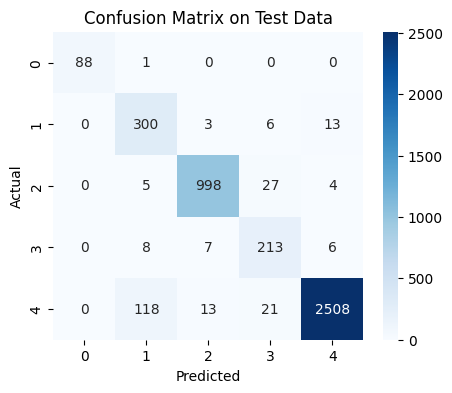

              precision    recall  f1-score   support

    Basophil       1.00      0.99      0.99        89
  Eosinophil       0.69      0.93      0.80       322
  Lymphocyte       0.98      0.97      0.97      1034
    Monocyte       0.80      0.91      0.85       234
  Neutrophil       0.99      0.94      0.97      2660

    accuracy                           0.95      4339
   macro avg       0.89      0.95      0.92      4339
weighted avg       0.96      0.95      0.95      4339



In [ ]:
y_pred = model.predict(test_ds)
y_pred_classes = y_pred.argmax(axis=1)

y_true = []
for _, labels in test_ds:
    y_true.extend(labels.numpy())
y_true = np.array(y_true)
y_true = np.argmax(y_true, axis=1)  

acc = accuracy_score(y_true, y_pred_classes)
print(f"Test Accuracy: {acc:.4f}") 

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix on Test Data")
plt.show()

print(classification_report(y_true, y_pred_classes, target_names=class_names))
